<h1><center>TU BERLIN SUMMER UNIVERSITY 2018</center></h1>
<h1><center>QUANTITATIVE DECISION MAKING FOR BUSINESS OPERATIONS</center></h1>

<h2><center>Case Study : Dynamic Pricing Problem for Revenue Management</center></h2>

<p> In the past Air Innovation used a standard EMSR-a booking policy to control their ticket sale. But like its name says, they want to be pioneer on innovative market and sales strategies. In the name of fighting their competitors Air Innovation thinks about possibilities to better exploit customers’ willingness-to-pay and in this way to secure their market position.</p>

In [91]:
# Load the relevant libraries
import pandas as pd 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp


   demand  P(d >= demand|Class 1)  P(d >= demand|Class 2)  \
0       1                0.982489                0.999936   
1       2                0.966957                0.999814   
2       3                0.941509                0.999498   
3       4                0.902736                0.998732   
4       5                0.847796                0.997008   

   P(d >= demand|Class 3)  Revenue_Class1  Revenue_Class2  Revenue_Class3  
0                0.999996      491.244590      289.981399      249.999095  
1                0.999988      483.478424      289.946115      249.996895  
2                0.999960      470.754478      289.854309      249.990064  
3                0.999881      451.367772      289.632166      249.970347  
4                0.999670      423.898066      289.132298      249.917418  
    demand  P(d >= demand|Class 1)  P(d >= demand|Class 2)  \
95      96                     0.0                     0.0   
96      97                     0.0                   

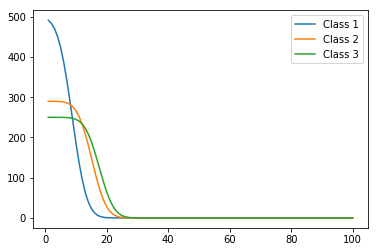

In [92]:
# Route -> TFS - FUE 
# Expected Marginal Seat Revenue
# All the demand curves follow a normal distribution

# Parameters
seatCapacity = 100
numberOfClasses = 4;
fares = [500, 290, 250, 205]
min_fare = 25
max_fare = 4400
distributionParameters = [(8.8, 3.7), (15.17, 3.7), (17.6, 3.7)]

# Create dataframe to calculate probabilities, expected revenues and protection levels
df = pd.DataFrame(columns=['demand', 'P(d >= demand|Class 1)', 'P(d >= demand|Class 2)', 'P(d >= demand|Class 3)', 
                          'Revenue_Class1', 'Revenue_Class2', 'Revenue_Class3'])

# form the demand list
capacity = []
for i in range(1, seatCapacity+1):
    capacity.append(i)

# Assign the capacity vecotr as demand
df['demand'] = capacity

for i in range(0,3):
    probVector = []
    revenueVector = []
    meanVal = distributionParameters[i][0]
    stdDev = distributionParameters[i][1]
    fare = fares[i]
    for j in range(0,seatCapacity):
        distNor = sp.norm(meanVal, stdDev)
        prob = 1- distNor.cdf(df['demand'][j])
        probVector.append(prob)
        revenueVector.append(prob*fare)
    cl1_name = "P(d >= demand|Class " + str(i+1) + ")"
    cl2_name = "Revenue_Class" + str(i+1)
    df[cl1_name] = probVector;
    df[cl2_name] = revenueVector;
    

# print the head and tails of the dataframe
print(df.head())
print(df.tail())

# function to determine the protection levels
def getProtectionLevels(class1_num, class2_num):
    cl1_name = "Revenue_Class" + str(class1_num)
    cl2_name = "Revenue_Class" + str(class2_num)
    
    pLevel = -1
    for j in range(0, seatCapacity-1):
        comFare = fares[class2_num-1]
        if (comFare < df[cl1_name][j] and comFare >= df[cl1_name][j+1]):
            pLevel = j;
            break;
    
    return j+1;


pl1_ag_2 = getProtectionLevels(1,2)
pl1_ag_3 = getProtectionLevels(1,3)
pl1_ag_4 = getProtectionLevels(1,4)
pl2_ag_3 = getProtectionLevels(2,3)
pl2_ag_4 = getProtectionLevels(2,4)
pl3_ag_4 = getProtectionLevels(3,4)

print("\nProtection Level between Class 1 and 2 =", pl1_ag_2)
print("Protection Level between Class 1 and 3 =", pl1_ag_3)
print("Protection Level between Class 1 and 4 =", pl1_ag_4)
print("Protection Level between Class 2 and 3 =", pl2_ag_3)
print("Protection Level between Class 2 and 4 =", pl2_ag_4)
print("Protection Level between Class 3 and 4 =", pl3_ag_4)

# Plot the expected revenues
plt.plot(df['demand'], df['Revenue_Class1'], label='Class 1')
plt.plot(df['demand'], df['Revenue_Class2'], label='Class 2')
plt.plot(df['demand'], df['Revenue_Class3'], label='Class 3')
plt.legend()
plt.show()
